In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
##Load Data
Litologi = np.loadtxt("Sumur A_Litologi.txt", skiprows=7160)
columns = ['DEPTH','Lithology']
Litologi = pd.DataFrame(Litologi, columns=columns)
# print(Litologi)
Lithology = Litologi[['Lithology']].values

data = np.loadtxt("Sumur A.LAS", skiprows=7198)
data[data==-999.2500]=np.nan
column = ['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']
data = pd.DataFrame(data, columns=column)
data['LITHO'] = Litologi[['Lithology']]
data = data.drop([7420],axis=0)
Depth = data[['DEPTH']].values
# print(Depth)

In [3]:
## CORRELATION ##
corr = pd.DataFrame(data.corr())
corrVs = corr[['DTS']]
corrVs['Abs'] = np.abs(corrVs[['DTS']])
corrVs = corrVs.drop(['CALI'],axis=0)
corrVs.sort_values(by=['Abs'], inplace=True, ascending=False)
print(corrVs)

corrVs = corrVs.drop(['DTS','MSFL','GR','SP'],axis=0)
name = list(corrVs.index)
# name.remove('DTS')
print()
print(name)

            DTS       Abs
DTS    1.000000  1.000000
DT     0.909764  0.909764
DEPTH -0.851938  0.851938
NPHI   0.816491  0.816491
LLS   -0.712202  0.712202
RHOB  -0.667958  0.667958
LLD   -0.667218  0.667218
LITHO  0.655307  0.655307
PEF    0.501562  0.501562
MSFL  -0.175543  0.175543
GR    -0.054325  0.054325
SP     0.013770  0.013770

['DT', 'DEPTH', 'NPHI', 'LLS', 'RHOB', 'LLD', 'LITHO', 'PEF']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
# model = DecisionTreeRegressor(random_state=0)
# model = SVR()
model = RandomForestRegressor(random_state=0)
# model = KNeighborsRegressor()

x = data[name]
y = data[['DTS']].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Parameter Default: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

#Train Evaluation#
Mean Absolute Error:  0.41821260525343107
Root Mean Square Error:  1.5764860641346587

#Test Evaluation#
Mean Absolute Error:  1.1265407858447871
Root Mean Square Error:  11.296321189915034


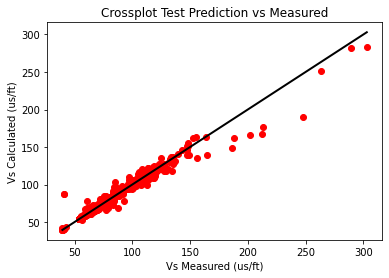

In [5]:
## TRAINING
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,test_size = 0.3,random_state=0)

##Normalization
scaler = StandardScaler()
x2_train= scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

#Training
model.fit(x2_train,y2_train)
predcr1 = model.predict(x2_train)
errcr1 = metrics.mean_absolute_error(y2_train,predcr1)
MSEcr1 = metrics.mean_squared_error(y2_train,predcr1)
p2 = model.get_params(deep=True)
print('Parameter Default: ',p2, sep='\n')
print()
print('#Train Evaluation#')
print('Mean Absolute Error: ',errcr1)
print('Root Mean Square Error: ', MSEcr1)

#TEST
predcr2 = model.predict(x2_test)
errcr2 = metrics.mean_absolute_error(y2_test,predcr2)
MSEcr2 = metrics.mean_squared_error(y2_test,predcr2)
print()
print('#Test Evaluation#')
print('Mean Absolute Error: ',errcr2)
print('Root Mean Square Error: ', MSEcr2)

plt.figure()
plt.scatter(y2_test,predcr2,color='red',label='data')
plt.plot([y2_test.min(),y2_test.max()],[y2_test.min(),y2_test.max()],'k-',lw=2)
plt.title('Crossplot Test Prediction vs Measured')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')

plt.show()

Mean Absolute Error:  1.0829771556337269
Root Mean Square Error:  5.040583947192773
r2:  0.9484195035400628
Correlaton:
[[1.         0.97480648]
 [0.97480648 1.        ]]


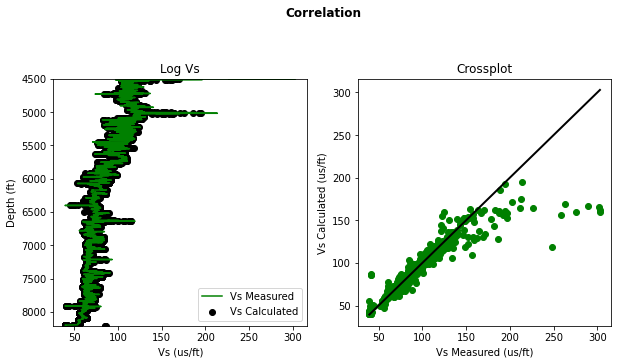

In [7]:
##Tanpa Tuning

##Normalization
scaler = StandardScaler()
xcr= scaler.fit_transform(x)

Vs_predcr = model.predict(xcr)
errorcr = metrics.mean_absolute_error(y,Vs_predcr)
MSE_errorcr = np.sqrt(metrics.mean_squared_error(y,Vs_predcr))
R2_scorecr = metrics.r2_score(y,Vs_predcr)

# corrcr = np.corrcoef(y[:,0],Vs_predcr[:,0])   # Algoritma KNN
corrcr = np.corrcoef(y[:,0],Vs_predcr[:])

print('Mean Absolute Error: ',errorcr)
print('Root Mean Square Error: ', MSE_errorcr)
print('r2: ', R2_scorecr)
print('Correlaton:',corrcr,sep='\n')

fig = plt.figure(figsize = (10,10))
fig.add_subplot(221)
plt.plot(y,Depth,color='g',lw=1.5,label='Vs Measured')
plt.scatter(Vs_predcr,Depth,color='black',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')
plt.xlabel('Vs (us/ft)')
plt.legend()

fig.add_subplot(222)
plt.scatter(y,Vs_predcr,color='g',label='data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=2)
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.suptitle('Correlation',fontweight='bold')

plt.show()

In [8]:
##Hyperparameter Optimization
# Decision Tree
# parameters = {'max_depth': [None, 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

# SVR
# parameters = {'C': list(np.arange(0,31))}

#Random Forest
parameters = {'n_estimators': np.arange(0,31)}

# #KNN
# parameters = {'n_neighbors': np.arange(0,31)}

cv = 10
Reg = GridSearchCV(model,param_grid=parameters,cv=cv,n_jobs=-1, scoring='neg_root_mean_squared_error',return_train_score=True)

In [9]:
## Best Parameter
Reg.fit(x2_train,y2_train)
best_param3 = Reg.best_params_
params3 = pd.DataFrame.from_dict(best_param3,orient='index')
params3 = params3.iloc[:,0].values
Split3 = pd.DataFrame(Reg.cv_results_)
best_index3 = Reg.best_index_

print('Best Parameters:', best_param3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 310.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 384, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.

  

Best Parameters: {'n_estimators': 27}


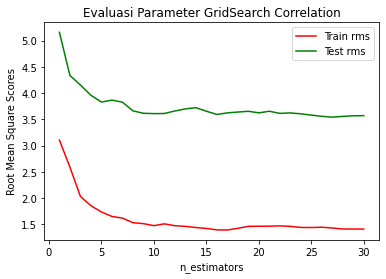

In [10]:
# Evaluation #
Eval = pd.DataFrame(Split3[['params']])
Eval['mean_train_score'] = Split3[['mean_train_score']]
Eval['mean_test_score'] = Split3[['mean_test_score']]

# SVR
# prm = 'C'
# par = np.arange(0,31)

#Random Forest
prm = 'n_estimators'
par = np.arange(0,31)

# #KNN
# prm = 'n_neighbor'
# par = np.arange(0,31)

#Decision Tree
# prm = 'max_depth'
# par = [None, 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Train_Scores3 = abs(Eval[['mean_train_score']].values)
Test_Scores3 = abs(Eval[['mean_test_score']].values)

plt.plot(par, Train_Scores3,'r-',label='Train rms')
plt.plot(par,Test_Scores3, 'g-',label='Test rms')
plt.title('Evaluasi Parameter GridSearch Correlation')
# plt.ylim(6,7)
plt.xlabel(prm)
plt.ylabel('Root Mean Square Scores')
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

#Train Evaluation#
Mean Absolute Error:  0.5186212419840588
Root Mean Square Error:  1.7231895822907155

#Test Evaluation#
Mean Absolute Error:  1.2628251592228215
Root Mean Square Error:  3.296799668429895
Score:  0.9447864252917137


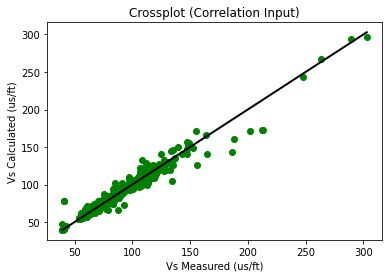

In [11]:
# Validation #
# Alg = DecisionTreeRegressor(max_depth=5,random_state=0)
# Alg = SVR(C=params3[0])   #Grid
Alg = RandomForestRegressor(n_estimators=5, n_jobs=-1,random_state=0)    #Grid
# Alg = KNeighborsRegressor(n_neighbors=10)
Alg.fit(x2_train,y2_train)
Vs_train = Alg.predict(x2_train)
Vs_test3 = Alg.predict(x2_test)

tmae3 = metrics.mean_absolute_error(y2_train,Vs_train)
trmse3 = np.sqrt(metrics.mean_squared_error(y2_train,Vs_train))
mae3 = metrics.mean_absolute_error(y2_test,Vs_test3)
rmse3 = np.sqrt(metrics.mean_squared_error(y2_test,Vs_test3))
cv_score3= cross_val_score(Alg, x2_test, y2_test, cv=10, scoring='r2')


print('#Train Evaluation#')
print('Mean Absolute Error: ', tmae3)
print('Root Mean Square Error: ', trmse3)
print()
print('#Test Evaluation#')
print('Mean Absolute Error: ',mae3)
print('Root Mean Square Error: ', rmse3)
print('Score: ', cv_score3.mean())


plt.figure()
plt.scatter(y2_test,Vs_test3,color='g',label='data')
plt.plot([y2_test.min(),y2_test.max()],[y2_test.min(),y2_test.max()],'k-',lw=2)
plt.title('Crossplot (Correlation Input)')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')

plt.show()

Mean Absolute Error:  1.2439455914369812
Mean Square Error:  5.72547731145354
r2:  0.9334501302327476
Correlaton:
[[1.         0.96684396]
 [0.96684396 1.        ]]


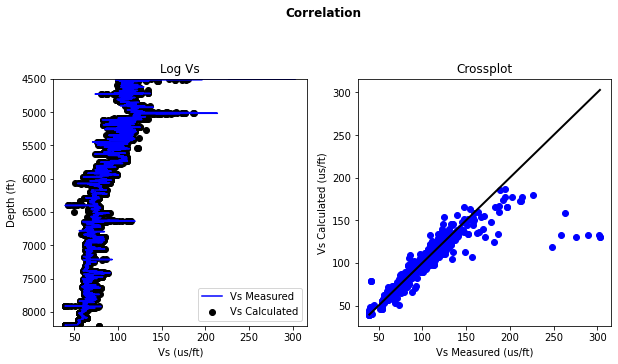

In [12]:
## PREDICTION ##
##Normalization
scaler = StandardScaler()
# xcr= scaler.fit_transform(xcr)

Vs_cal3 = Alg.predict(xcr)
mae_cr = metrics.mean_absolute_error(y,Vs_cal3)
rmse_cr = np.sqrt(metrics.mean_squared_error(y,Vs_cal3))
R2_cr = metrics.r2_score(y,Vs_cal3)
corr_cr = np.corrcoef(y[:,0],Vs_cal3[:])
# corr_cr = np.corrcoef(y[:,0],Vs_cal3[:,0])    # Algoritma KNN

print('Mean Absolute Error: ',mae_cr)
print('Mean Square Error: ', rmse_cr)
print('r2: ', R2_cr)
# print('Score: ', score_cr.mean())
print('Correlaton:',corr_cr,sep='\n')

fig = plt.figure(figsize = (10,10))
fig.add_subplot(221)
plt.plot(y,Depth,color='b',lw=1.5,label='Vs Measured')
plt.scatter(Vs_cal3,Depth,color='black',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')
plt.xlabel('Vs (us/ft)')
plt.legend()

fig.add_subplot(222)
plt.scatter(y,Vs_cal3,color='b',label='data')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k-',lw=2)
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.suptitle('Correlation',fontweight='bold')


plt.show()